In [ ]:
pip install plotly

In [ ]:
pip install chart_studio

In [ ]:
pip install plotly.express

In [ ]:
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('../input/indian-food-101/indian_food.csv')

In [ ]:
df

In [ ]:
df.isnull().sum()

We can see that region has a missing value, so let us fill it with the most occuring value in region feature.

In [ ]:
df.region.value_counts()

Here we also noticed something that most of the values are not related region so we also fill that with West as its odds are more.

In [ ]:
df = df.fillna(df['region'].value_counts().index[0])

In [ ]:
df.isnull().sum()

In [ ]:
df.region.map({'-1':'West'})

In [ ]:
df.region.value_counts()

As we see here, the one value which was missing in region column, I assigned it to west so total count of western region changed to 75 from 74.

In [ ]:
df.region.replace(['West', 'East','Central','North','South','North East','-1'], ['West', 'East','Central','North','South','North East','West'], inplace=True)

In [ ]:
df.region.value_counts()

Now here we see, the west value counts increased to 88 from 75 and here we complete data cleaning and wrangling of region column, now lets move towrads next feature!!

In [ ]:
df.columns

In [ ]:
df.diet.value_counts()

The feature values seem correct and no inappropriate values found and all values are present in this diet series so lets move to next feature.

In [ ]:
df.prep_time.value_counts()

The person who created this dataset clealry stated that -1 in any column means that is a NAN values and here also we have many nan values, like around 30.

Non-vegeterian foods take a little longer time to cook so if a non-veg food has a NAN value, we will fill it with a higher time lets say 180 minutes.

In [ ]:
pd.set_option('display.max_rows', 500)

The next steps will be little complicated to understand as I'm extracting and modifying values

In [ ]:
df

In [ ]:
df['Total_time']=df.prep_time+df.cook_time

In [ ]:
dd=df[df['diet']=='vegetarian']

In [ ]:
dd

In [ ]:
dd.Total_time.value_counts().sum()

In [ ]:
dd.Total_time.sum()/226

Here we see the average as nearly to 70 minutes but there are many -1 values which are NAN values acoording to the data scrapper.

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(x=dd.Total_time)
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(14,10))
plt.hist(x=dd.Total_time,bins=100,density=True)

This is a Left Skewwed data as we can clearly see in the above graph and the outliers are clearly potryaed.
Here the outliers are the Total time exceeding 120+ minutes, but for EDA we will consider the outliers too because this domain, we can't neglect the exotic dishes.

The average of vegetarian total time is approx 100 minutes so lets fill features with it.

In [ ]:
df1=df[df['diet']=='vegetarian']

Here I have extracted column of diet with vegetarians as the only value.

In [ ]:
df2=df[df['diet']=='non vegetarian']

Here I have extracted column of diet with only non vegetarians value.

In [ ]:
d_under_modification=df1[df1['prep_time']==-1]

In [ ]:
d_under_modification

Here I have extracted the data from the only vegetarian values containg -1 values.

In [ ]:
d_modification=d_under_modification.prep_time.replace({-1:30})

In [ ]:
d_modification

And here lastly I change the -1 values in in vegetarian dataframe to 30 in prep_time and I will also add 30 to cook_time so total_time makes up to 60 as potrayed eariler in this notebook.

In [ ]:
d_under_modification.drop(['prep_time'],axis=1,inplace=True)

In [ ]:
d_under_modification['prep_time']=d_modification

In [ ]:
d_under_modification

In [ ]:
df=df[df['prep_time']!=-1]

Here I dropped the -1 values in main dataframe so that i can add the modified values.

In [ ]:
df=pd.concat([df,d_under_modification])

Here i merge both the dataframe and we have modified the vegeterians value but not the non vegetarian values



In [ ]:
df

In [ ]:
df.prep_time.value_counts().sum()

We know that we have total of 255 values, the 10 values missing are the 10 values of -1 in non vegetarian column.

In [ ]:
non_veg_prep_time_missing=df2[df2['prep_time']==-1]

Here we can see that 10 values are missing because they are -1 values in prep_time feature with respect to non vegetarian diet so now lets work on it.

In [ ]:
non_veg_prep_time_missing.replace({-1:45},inplace=True)

In [ ]:
non_veg_prep_time_missing

In [ ]:
df=pd.concat([df,non_veg_prep_time_missing])

In [ ]:
df

In [ ]:
df.prep_time.value_counts().sum()

So here we cleaned all values of prep time so lets move forward to next feature cook_time

In [ ]:
df.reset_index()

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df3=df.cook_time.replace({-1:30})

In [ ]:
df3

In [ ]:
df['cook_time']=df3

In [ ]:
df.cook_time.value_counts().sum()

Hence Here we are done with cooking time and prep_time so lets move forward with another feature.

In [ ]:
df.reset_index()

In [ ]:
df['Total_time']=df.prep_time+df.cook_time

In [ ]:
df

So now lets move to the next feature which is flavour profile

In [ ]:
df_flavour_profile=df.flavor_profile

In [ ]:
df_flavour_profile.value_counts()

Here also we have 29 missing values which we will try to fill by course as if its a desert, it will be sweet, and if its snack or main course, its more likely to be spicy

In [ ]:
df_course=df[df['course']=='dessert']

In [ ]:
df_course.flavor_profile.isnull().sum()

Here we see that there is no flavor profile which is not labelled as -1 if its a desert which means that the missing values will be of main-course or snaks which's odds of being spicy is quit high so lets fill -1 values in flavor profile as spicy.

In [ ]:
df_course=df[df['course']=='main course']

In [ ]:
df_course.flavor_profile.value_counts()

Here out of 29 missing values, 26 out of them are main course and 3 are of snacks so lets fill it with spicy

Here you guys must be thinking that why I used strings to potray -1, this is because the columns dtype, its not an integer so I used it as string.

In [ ]:
df_flavour_profile.replace({'-1':'spicy'})

In [ ]:
df[df['flavor_profile']=='-1']

In [ ]:
df.replace({'-1':'spicy'},inplace=True)

In [ ]:
df.flavor_profile.value_counts().sum()

In [ ]:
df.flavor_profile.value_counts()

Here we cleaned the flavor_profile feature so lets move to next feature!!

In [ ]:
df

In [ ]:
df_region=df.region

In [ ]:
df_region

In [ ]:
df.region.value_counts()

Now lets see all the features and check everything is proper before moving forward.

In [ ]:
df_diet=df.diet

In [ ]:
df.diet.value_counts()

In [ ]:
df.diet.value_counts().sum()

The diet feature looks good.

In [ ]:
df_prep_time=df.prep_time

In [ ]:
df_prep_time.value_counts()

In [ ]:
df_prep_time.value_counts().sum()

The prep_time looks good.

In [ ]:
df_cook_time=df.cook_time

In [ ]:
df_cook_time.value_counts()

In [ ]:
df_cook_time.value_counts().sum()

Here cook_time is also looking good.

In [ ]:
df.columns

In [ ]:
df_flavour_profile=df.flavor_profile

In [ ]:
df_flavour_profile.value_counts().sum()

In [ ]:
df_flavour_profile.value_counts()

The flavor_profile looks good.

In [ ]:
df_course=df.course

In [ ]:
df.course.value_counts()

In [ ]:
df.course.value_counts().sum()

Course feature also looks good, lets see next

In [ ]:
df_state=df.state

In [ ]:
df_state.value_counts()

Here we see that here spicy is a value, this is because when we last replace the values, we replaced in the whole dataframe!!

SO now lets work on this!!!

Here we cannot determine the states name from the dish and as we had filled the region with WEST, its better to drop this values as it will work as noise to data and will give false report.

In [ ]:
df.state.replace({'spicy':np.nan},inplace=True)

In [ ]:
df_state=df.state

In [ ]:
df_state.value_counts()

In [ ]:
df_state.value_counts().sum()

In [ ]:
df

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

In [ ]:
df.diet.value_counts().sum()

In [ ]:
df.prep_time.value_counts().sum()

In [ ]:
df.cook_time.value_counts().sum()

In [ ]:
df.name.value_counts().sum()

In [ ]:
df.flavor_profile.value_counts().sum()

In [ ]:
df.course.value_counts().sum()

In [ ]:
df.region.value_counts().sum()

In [ ]:
df.state.value_counts().sum()

In [ ]:
df.Total_time.value_counts().sum()

Here we complete our data cleaning so lets move forward with the EDA

In [ ]:
import plotly_express as px

In [ ]:
px.scatter(df,x='prep_time',y='cook_time',color='diet')

Try to select the area you want to examine correctly as I did it.

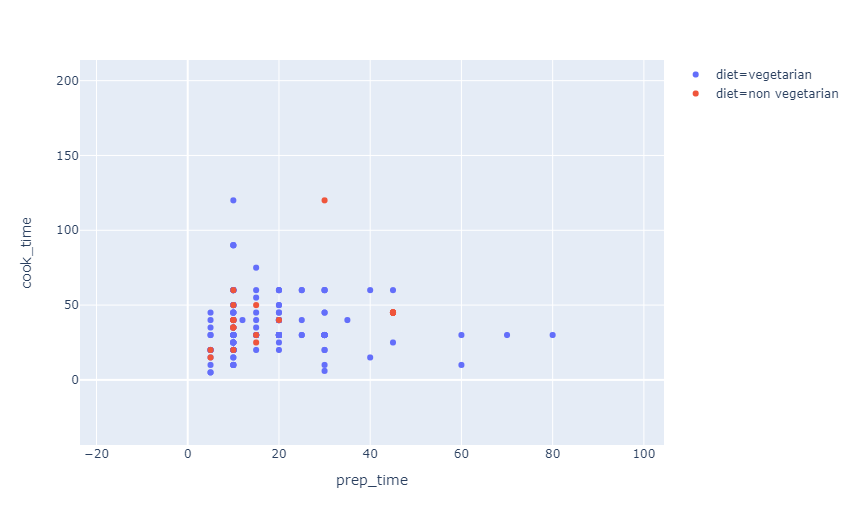

Here I thought there are lot of values in between 10-90 so I selected that part of area to get more information. This bascically a zoomed in version of the same graph.

**Conclusions drawn:**



1.   Prepartion time is usually less than cooking time.
2.   Most of vegetarian food is seen in this section which means it takes less time to cook vegetarian food than to cook non-vegetarian food.


3.   There is one exception in vegetarian food which point sits top of the graph which has less preparation time but a long cooking time.
   







In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.prep_time)

In [ ]:
px.scatter(df,x='prep_time',y='cook_time',color='diet',marginal_y="violin",
           marginal_x="box", trendline="ols",template='simple_white')

In [ ]:
px.scatter(df,x=df.prep_time,y=df.region,color=df.course,opacity=0.5)

**Conclusion drawn:**

1.   Here we can see that North-East's famous food falls under main course category.
2.   Western region has more of famous snacks as I'm from westen I can say about it too.
1.   Northern region has more famous main course dishes.
2.  South has equal cateogries of famous food items.

For more clear analysis of this graph, select the particular area of chart for zoomed in axis as I have done below.....

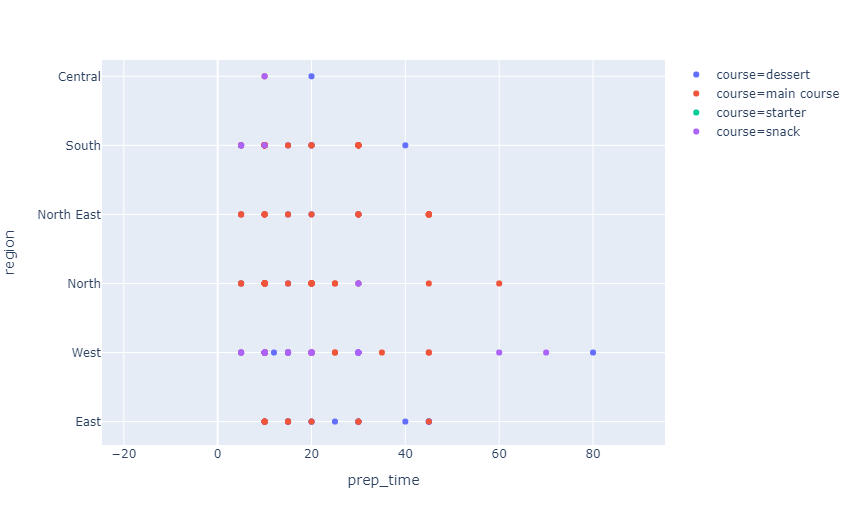




In [ ]:
px.scatter(df,x=df.prep_time,y=df.course,color=df.flavor_profile,opacity=0.5)

**Conclusion:**

1.   Preparation time of all kinds food is less and there are some exceptionals which we can see in the above graph.
2.   We can see more detailed information about preparation time once we zoom in as you can see in the below graph...[**NOTE:** This graph is not interactive as it is a screen shot, you can adjust the zoom in and out in above code output.]
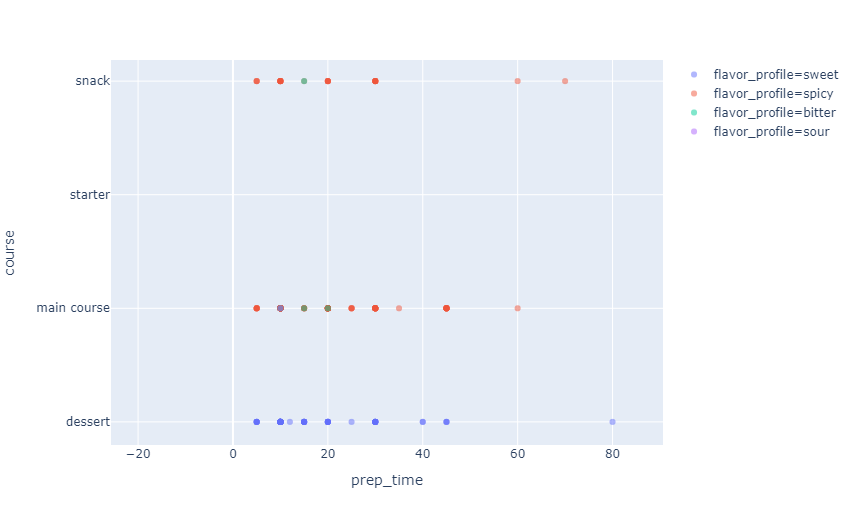



In [ ]:
px.scatter(df,x=df.cook_time,y=df.course,color=df.flavor_profile,opacity=0.5)

**Conclusion:**

1.   Here the cooking time of all types almost is between 15-90.
2.   To look for detailed information, zoom in the graph.

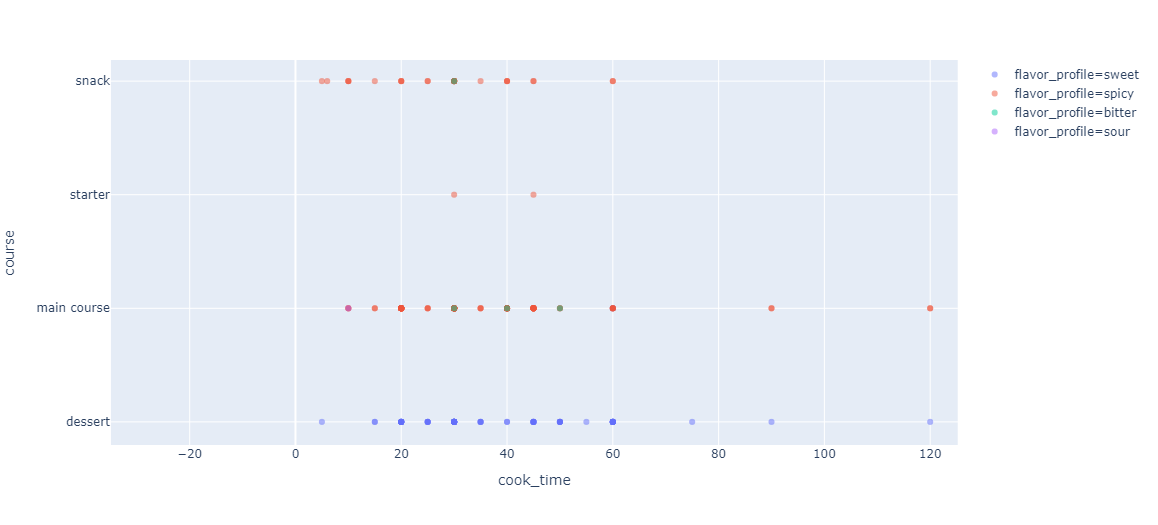



In [ ]:
px.scatter(df,x=df.flavor_profile,y=df.course,color=df.diet,opacity=0.2)

**Conclusion:**

1.   Desert is always sweet and vegetarian as we all know.   
2.   Less variety of main course is sweet and vegetarian.
1.   Most of the main course varieties are spicy and non-vegetarian.
2.   Snacks are mainly spicy and and vegetarian.
1.   Hardly any main course and starter are bitter and sour.







In [ ]:
px.bar(df,x=df.name,y=df.region,color=df.course)

**Conclusion:**

1.   Most famous items are from western and eastern region




In [ ]:
df['Region ID']=np.nan

In [ ]:
df

In [ ]:
df.loc[:,['region']]

In [ ]:
df.region.value_counts()

In [ ]:
df['Region_ID']=df.region.replace({"North":1,"North East":2,"East":3,"South":4,"West":5,"Central":6})

In [ ]:
df

Here I had mistakenly created two regional ID's so I will have to drop one of them.

In [ ]:
df.drop(['Region ID'],axis=1,inplace=True)

In [ ]:
df

Lets check if the there is some problem with the new feature and if not then we will move forward.
Here I have added a new feature because I wanted to show parallel coordinates graph because it if one of the most convincing graphs I have ever seen.

In [ ]:
df.Region_ID.value_counts()

In [ ]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)


In [ ]:
df.flavor_profile.value_counts()

In [ ]:
df['Flavor_Profile_ID']=df.flavor_profile.replace({'spicy':4,'sweet':3,'bitter':2,'sour':1})

In [ ]:
df

In [ ]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','Flavor_Profile_ID'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)


Lets add more values to it.
I'm adding feature ID's because this graph only takes numerical values.

In [ ]:
df.course.value_counts()

In [ ]:
df['Course_ID']=df.course.replace({'main course':4,'dessert':3,'snack':2,'starter':1})

In [ ]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','Flavor_Profile_ID','Course_ID'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

In [ ]:
df.state.value_counts()

In [ ]:
df['State_ID']=df.state.replace(df.state.value_counts())

It was tough for me to go through each of the unique value in the state column and assign it a particular number, so I chaged it with the number of times its values is observed in the data.

In [ ]:
df

In [ ]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','State_ID','Flavor_Profile_ID','Course_ID'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

In [ ]:
df['Diet_ID']=df.diet.replace({'vegetarian':1,'non vegetarian':2})

In [ ]:
df.Diet_ID.value_counts()

In [ ]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','State_ID','Flavor_Profile_ID','Course_ID','Diet_ID'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

Here the whole data is shown, I know it looks too sophisticated, but this graph  has lot to say.

Here down see what I have done,Eg: If I'm on my vacation and I have time to cook food, but I don't want time to exceed 300 minutes and not less than 150 minutes so I will select the time between 150-300 in Total time and I wanna eat vegetarian so I select 1 in other Diet_ID and it will display it all.

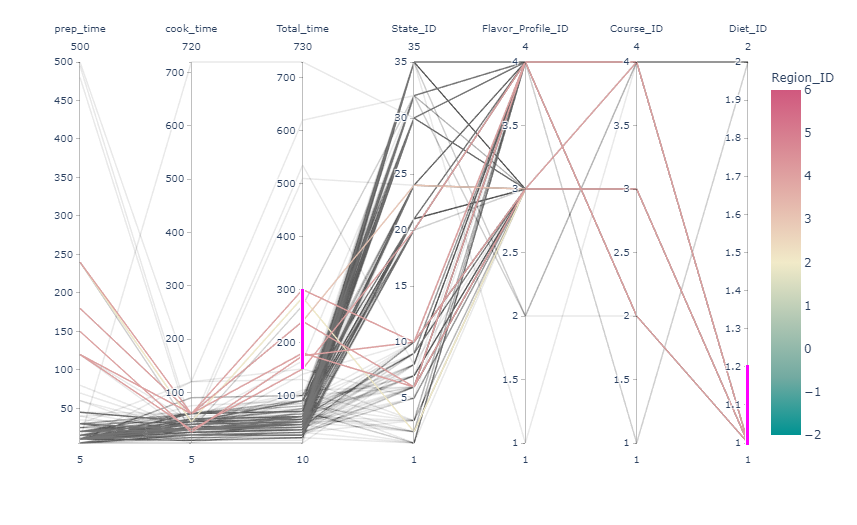



In [ ]:
px.parallel_coordinates(df, color="Region_ID",
                              dimensions=['prep_time', 'cook_time'
                                          ,'Total_time','State_ID','Flavor_Profile_ID','Course_ID','Diet_ID'],
                              color_continuous_scale=px.colors.sequential.Inferno,
                              color_continuous_midpoint=2)

Just changed the colors in the graph in the upper code.

In [ ]:
px.scatter(df, x="prep_time", y="cook_time", animation_frame="diet", animation_group="name",
            color="flavor_profile", hover_name="name", facet_col="region",
           log_x=True,log_y=True, size_max=45, range_x=[100,700], range_y=[25,90])

Here you can see each of the items with cool animation provided below.
You can adjust the X and Y axis to see different times and also hover on the dots for name of he dish as I have done below.

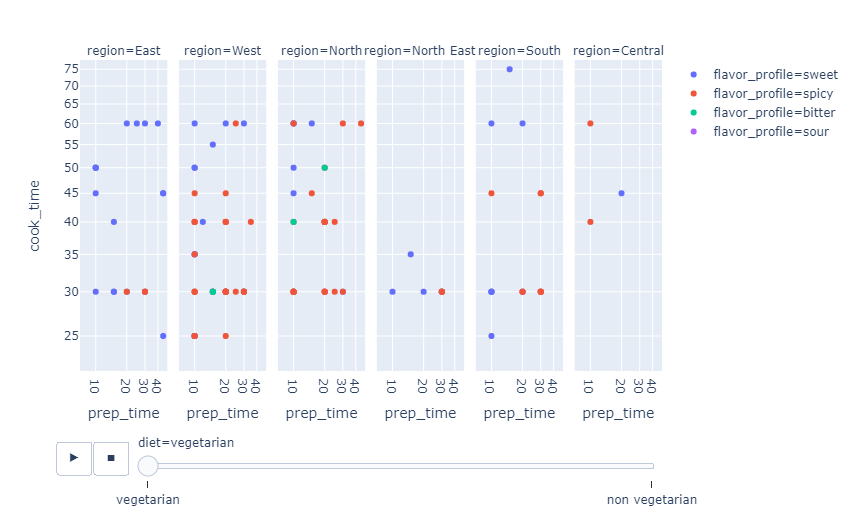



In [ ]:
px.pie(df, values=df.diet.replace({'vegetarian':1,'non vegetarian':1}), names=df.diet)

In [ ]:
px.histogram(df, x="Total_time", y="prep_time", color="diet", hover_data=df.columns)

The Above graph shows clear relation between the name of famous dishes from each region and course and total time taken by it.

In [ ]:
df.drop(['State_ID','Course_ID','Region_ID','Flavor_Profile_ID','Diet_ID'],axis=1,inplace=True)

In [ ]:
px.strip(df, x="Total_time", y="region", orientation="h", color="course",hover_data=df.columns)

**ConClusion:**

1.   In Western region Maharashtra's famous dish,named shrikhand, a desert is consuming more time for its final output. 
2.   In Eastern region, Misti doi, a sweet from west Bengal takes most time.
1.   In Northern region,Pindi channa a famous dish takes the most time for its final output.
2.   In North-Eastern region, Manipurs famous sweet 





In [ ]:
px.density_heatmap(df, x="cook_time", y="prep_time", marginal_x="rug", marginal_y="histogram")

In [ ]:
px.scatter_3d(df, x="prep_time", y="cook_time", z="Total_time", color="course",  hover_name="name",
                   color_discrete_map = {"prep_time": "blue", "cook_time": "green", "Total_time":"red"})

Hover your cursor on each point to know about the dishes and time need to cook them!!

No doubt to say a last point is that Indians like to eat much spicy food as most of the dishes above have a some sought of spicy flavor in it except the desert!!

All Conclusions drawn are wriiten after each graphs which will help us for understanding data well!!

Thank You!!